In [15]:
# Bootstrapped Language-Image Pre-training
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering
import matplotlib.pyplot as plt

# BlipProcessor and BlipForQuestionAnswering instance
processor = BlipProcessor.from_pretrained("ybelkada/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("ybelkada/blip-vqa-base")

In [13]:
print(model.device)

cpu


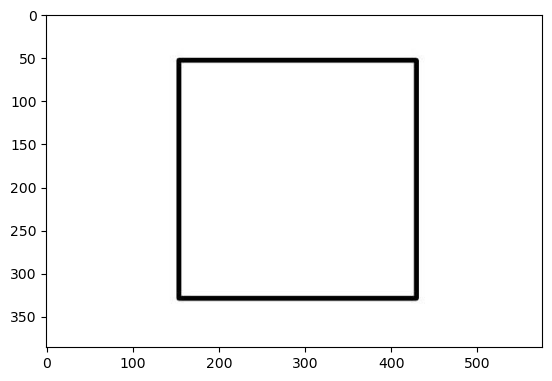

/home/xinghao/anaconda3/envs/xinghao/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Question: what shape is?
square


In [16]:
img_url = "https://img0.baidu.com/it/u=1234692956,2844800437&fm=253&fmt=auto&app=138&f=JPEG?w=576&h=386" 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

plt.imshow(raw_image)
plt.show()

question = "what shape is?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print("Question:",question)
print(processor.decode(out[0], skip_special_tokens=True))
# total_params = sum(p.numel() for p in model.parameters())
# print(total_params)